In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
import kagglehub

path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\andno\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


In [55]:
customers = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'))
order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
products = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'))
sellers = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))
product_category_name_translation = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))

In [56]:
# ------------------------- EDA ------------------------- #

In [57]:
# ----- MERGING ----- #

main_df = order_items.merge(order_payments, on='order_id') \
                     .merge(order_reviews, on='order_id')\
                     .merge(products, on='product_id')\
                     .merge(product_category_name_translation, on='product_category_name')\
                     .merge(sellers, on='seller_id')\
                     .merge(orders, on='order_id')\
                     .merge(customers, on='customer_id')

In [58]:
main_df['order_purchase_timestamp'] = pd.to_datetime(main_df['order_purchase_timestamp'])
last_purchase = main_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
last_purchase.columns = ['customer_unique_id', 'last_purchase_date']
main_df = main_df.merge(last_purchase, on='customer_unique_id', how='left')

In [59]:
last_purchase 

,customer_unique_id,last_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93392,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93393,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93394,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [60]:
main_df 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_purchase_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-09-18 16:12:04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02-04 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,...,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,2018-04-23 13:57:06
115605,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,...,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,2018-07-14 10:26:46
115606,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,...,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,2017-10-23 17:07:56
115607,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,...,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,2017-08-14 23:02:59


C:\Users\andno\AppData\Local\Temp\ipykernel_64460\1465881216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot.index, y=plot.values, palette='viridis')


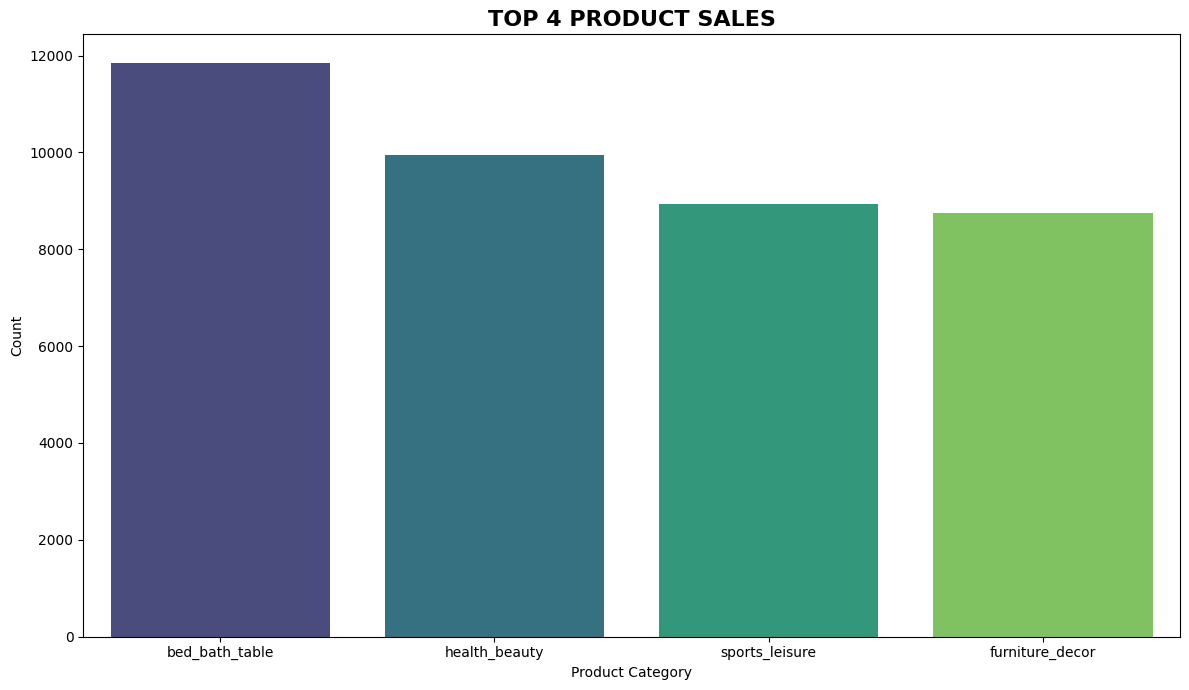

In [61]:
# TOP PRODUCT_CATEGORY SALES 
plot = main_df['product_category_name_english'].value_counts().head(4)

plt.figure(figsize=(12, 7))
sns.barplot(x=plot.index, y=plot.values, palette='viridis')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.title('TOP 4 PRODUCT SALES', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\andno\AppData\Local\Temp\ipykernel_64460\720477097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_diversity', data=product_diversity, palette=['#4c72b0', '#55a868'])


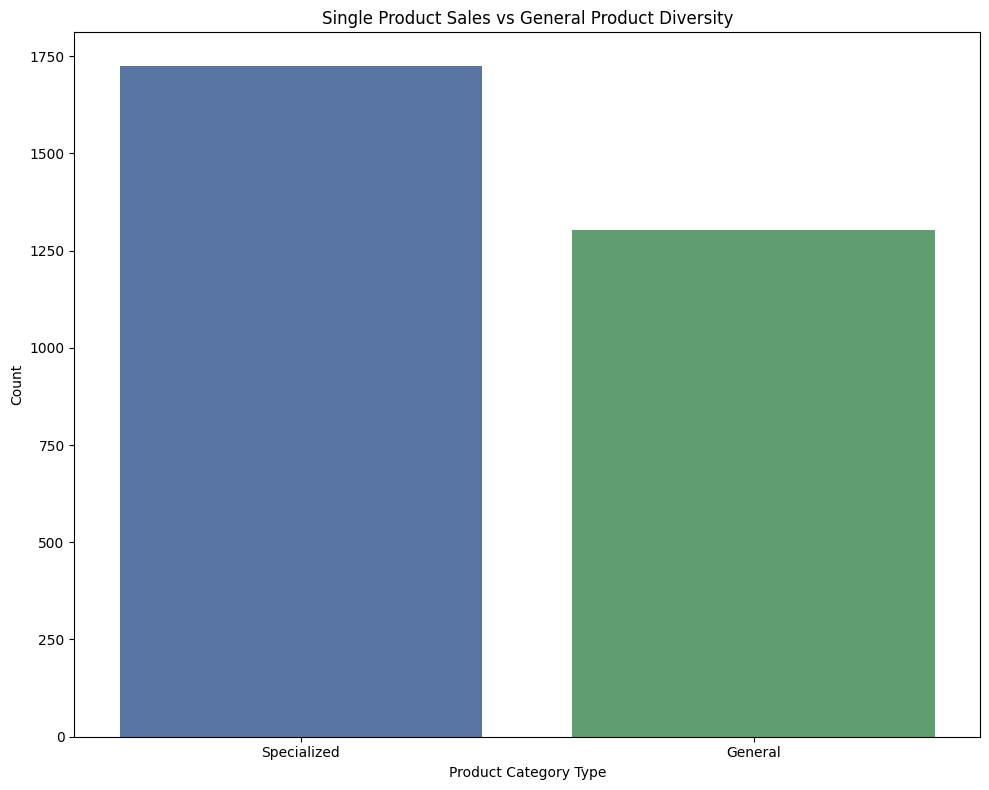

In [62]:
# SINGLE PRODUCT SALES VS GENERAL PRODUCT DIVERSITY 
product_diversity = main_df.groupby('seller_id')['product_category_name_english'].nunique().reset_index(name='seller_count')
product_diversity['product_diversity'] = product_diversity['seller_count'].map(lambda x: 'Specialized' if x == 1 else 'General')

plt.figure(figsize=(10,8))
sns.countplot(x='product_diversity', data=product_diversity, palette=['#4c72b0', '#55a868'])
plt.xlabel('Product Category Type')
plt.ylabel('Count')
plt.title('Single Product Sales vs General Product Diversity')
plt.tight_layout()
plt.show()

In [88]:
# Create a flag for subsequent purchasers (customers with 2 or more orders)
customer_order_counts = main_df.groupby('customer_unique_id')['order_id'].transform('nunique')
main_df['subsequent_purchaser'] = np.where(customer_order_counts >= 2, 'Yes', 'No')

In [93]:
main_df['subsequent_purchaser'].value_counts()

subsequent_purchaser
No     107405
Yes      8204
Name: count, dtype: int64

In [63]:
main_df = main_df.merge(product_diversity, on='seller_id', how='left')

In [70]:
product_diversity_test = main_df.groupby('customer_unique_id')['product_diversity'].max().reset_index()

In [95]:

customer_unique_stuff = main_df.groupby('customer_unique_id')['subsequent_purchaser'].max().reset_index()
customer_unique_stuff

,customer_unique_id,subsequent_purchaser
0,0000366f3b9a7992bf8c76cfdf3221e2,No
1,0000b849f77a49e4a4ce2b2a4ca5be3f,No
2,0000f46a3911fa3c0805444483337064,No
3,0000f6ccb0745a6a4b88665a16c9f078,No
4,0004aac84e0df4da2b147fca70cf8255,No
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,No
93392,fffea47cd6d3cc0a88bd621562a9d061,No
93393,ffff371b4d645b6ecea244b27531430a,No
93394,ffff5962728ec6157033ef9805bacc48,No


In [98]:
customer_unique_stuff['subsequent_purchaser'].value_counts()

subsequent_purchaser
No     90589
Yes     2807
Name: count, dtype: int64

<Axes: xlabel='product_diversity', ylabel='payment_value'>

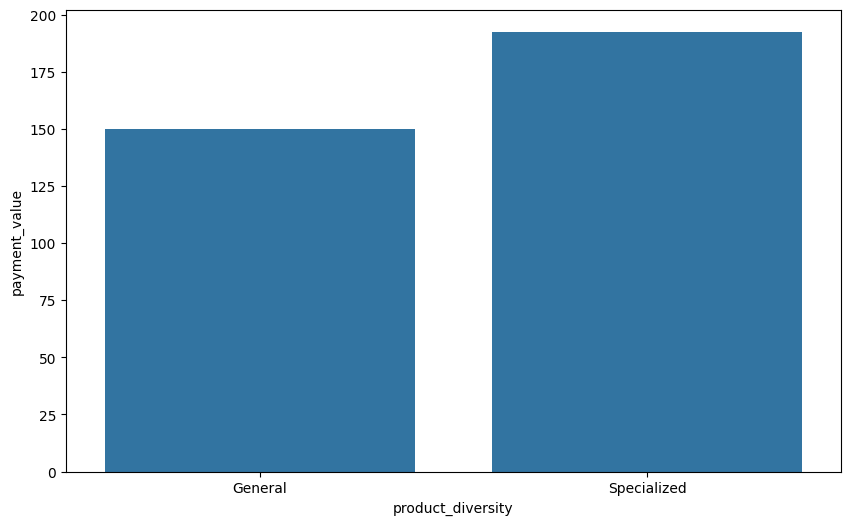

In [114]:
customer_payment_value = main_df.groupby('customer_unique_id')['payment_value'].mean().reset_index()
diveristy_vs_payment = product_diversity_test.merge(customer_payment_value, on='customer_unique_id', how='left') 
payment_plot = diveristy_vs_payment.groupby('product_diversity')['payment_value'].mean().reset_index() 
plt.figure(figsize=(10,6))
sns.barplot(x='product_diversity', y='payment_value', data=payment_plot)

In [115]:
customer_unique_review = main_df.groupby('customer_unique_id')['review_score'].mean().reset_index()

In [119]:
yes = product_diversity_test.merge(customer_unique_stuff, on='customer_unique_id') \
    .merge(customer_payment_value, on='customer_unique_id') \
    .merge(customer_unique_review, on='customer_unique_id')
yes = yes[yes['subsequent_purchaser']=='Yes']

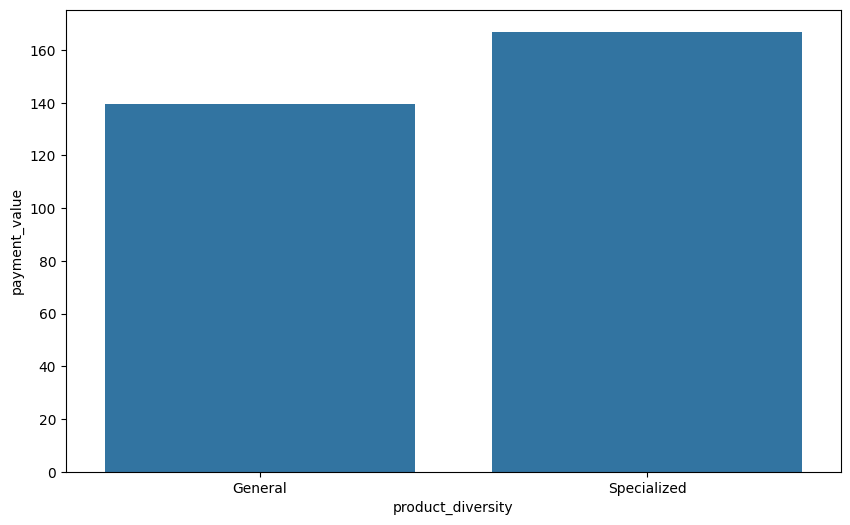

In [135]:
payment_diversity = yes.groupby('product_diversity')['payment_value'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='product_diversity', y='payment_value', data=payment_diversity) 
plt.show()

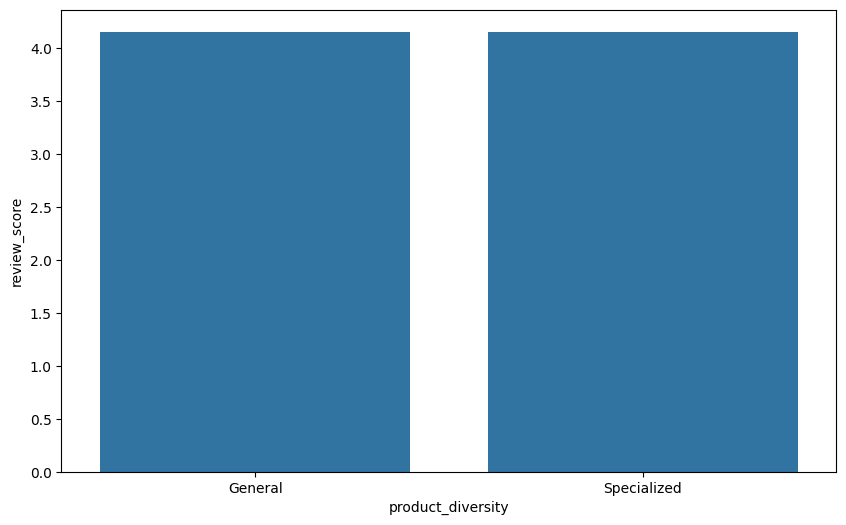

In [130]:
review_diversity = yes.groupby('product_diversity')['review_score'].mean().reset_index() 
plt.figure(figsize=(10,6))
sns.barplot(x='product_diversity', y='review_score', data=review_diversity)
plt.show() 

In [124]:
lolol = yes.groupby('product_diversity')['subsequent_purchaser'].count().reset_index()

In [125]:
lolol

,product_diversity,subsequent_purchaser
0,General,1862
1,Specialized,945


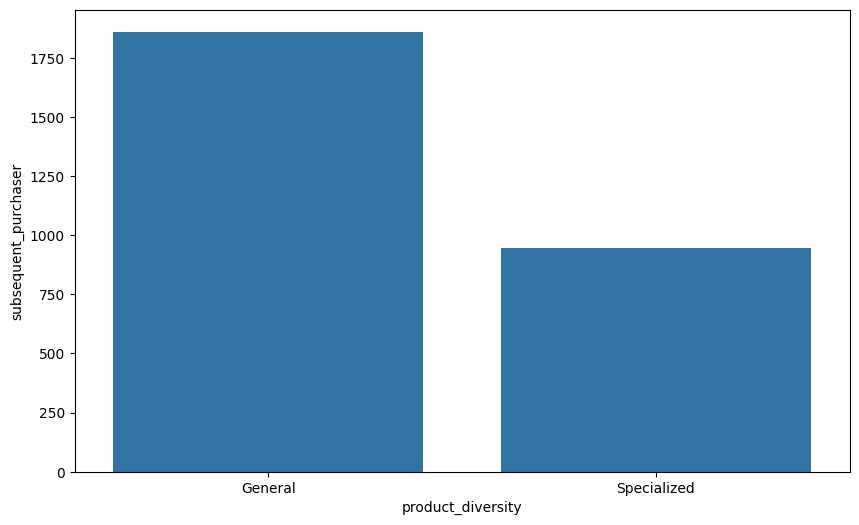

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(x='product_diversity', y='subsequent_purchaser', data=lolol) 
plt.show() 

In [ ]:
# SELLLER DIVERSITY VS BASKET VALUE 
order_basket_value = (
    order_items.groupby('order_id')
    .agg({'price': 'sum', 'freight_value': 'sum'})
    .assign(total_value=lambda x: x['price'] + x['freight_value'])
    .reset_index()
)

plot2  = (
    order_items.merge(product_diversity, on='seller_id')
    .merge(order_basket_value, on='order_id')
)


Correlation between seller diversity and basket value: -0.07


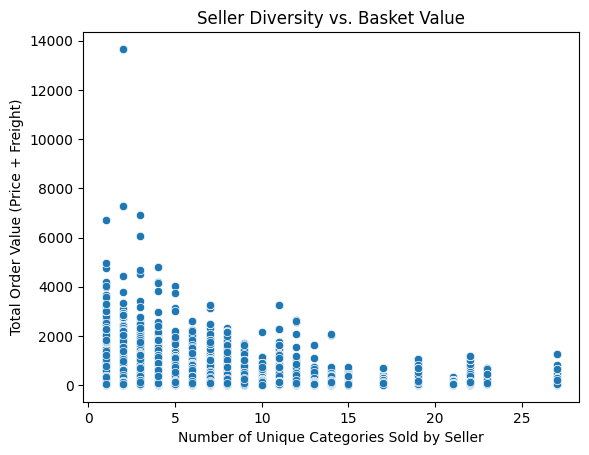

In [ ]:
correlation = plot2['seller_count'].corr(plot2['total_value'])
print(f"Correlation between seller diversity and basket value: {correlation:.2f}")

sns.scatterplot(data=plot2, x='seller_count', y='total_value')
plt.title("Seller Diversity vs. Basket Value")
plt.xlabel("Number of Unique Categories Sold by Seller")
plt.ylabel("Total Order Value (Price + Freight)")
plt.show()

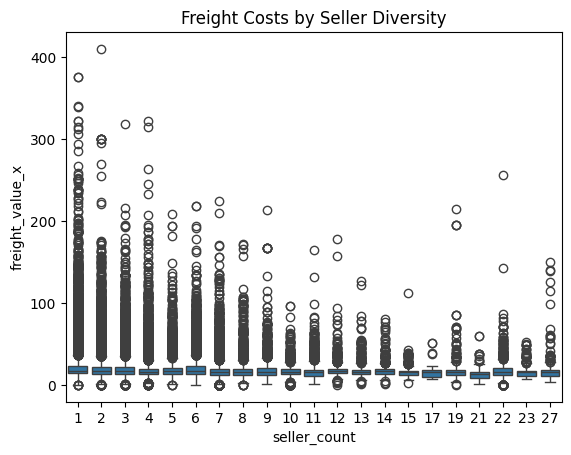

In [ ]:
# FREIGHT COSTS VS SELLER DIVERSITY 

sns.boxplot(data=plot2, x='seller_count', y='freight_value_x')
plt.title("Freight Costs by Seller Diversity")
plt.show()

In [ ]:
((main_df['customer_unique_id'].value_counts()) >= 2).sum()

np.int64(14019)

In [ ]:
# ------------------------- TARGET AUDIENCE FILTERS  ------------------------- #

# Repeat Customers (>2 orders)
repeat_customer_ids = (
	main_df.groupby('customer_unique_id')['order_id']
	.nunique()
	.loc[lambda x: x >= 2]
	.index
) 

# Last purchase within 12 months 
latest_date = main_df['last_purchase_date'].max()
twelve_months_ago = latest_date - pd.DateOffset(months=12)
recent_customer_ids = last_purchase[last_purchase['last_purchase_date'] >= twelve_months_ago]['customer_unique_id']

#Filters 
target_audience = main_df.loc[
	(main_df['customer_unique_id']).isin(repeat_customer_ids)  & 
    (main_df['order_status'] == 'delivered') & 
    (main_df['customer_unique_id']).isin(recent_customer_ids)
]

target_audience 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,last_purchase_date,seller_count,product_diversity
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-09-18 16:12:04,1,Specialized
37,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,1,credit_card,10,...,2017-04-17 13:54:37,2017-05-23 08:32:07,2017-05-19 00:00:00,98758d88bf4b8eef1372ddee45d63178,57250,campo alegre,AL,2017-09-17 06:44:58,1,Specialized
53,0020a222f55eb79a372d0efee3cca688,1,e19ddcc85537b41f22116c8d5425ef46,8a32e327fe2c1b3511609d81aaf9f042,2017-08-21 03:03:44,29.99,15.10,1,credit_card,4,...,2017-08-15 16:40:22,2017-08-24 19:19:56,2017-09-06 00:00:00,87ae4c644c15d9c6b6f826dfec33b340,27273,volta redonda,RJ,2017-11-14 00:52:49,2,General
146,005d9a5423d47281ac463a968b3936fb,1,fb7a100ec8c7b34f60cec22b1a9a10e0,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,49.99,18.12,1,credit_card,10,...,2017-10-24 14:56:52,2017-10-27 19:19:43,2017-11-17 00:00:00,6204c4e582a95b6a350adf6988623bfb,13720,sao jose do rio pardo,SP,2018-03-03 20:44:07,4,General
147,005d9a5423d47281ac463a968b3936fb,2,4c3ae5db49258df0784827bdacf3b396,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,24.99,13.58,1,credit_card,10,...,2017-10-24 14:56:52,2017-10-27 19:19:43,2017-11-17 00:00:00,6204c4e582a95b6a350adf6988623bfb,13720,sao jose do rio pardo,SP,2018-03-03 20:44:07,4,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115464,ffaabba06c9d293a3c614e0515ddbabc,1,8634ba98d69440265e955814c3e4cde1,05ff92fedb5be47920fea08e501238b9,2017-11-30 03:51:54,119.00,34.63,1,boleto,1,...,2017-11-28 22:08:24,2017-12-19 16:19:01,2017-12-21 00:00:00,19c60787f1a478ec7345d03bc4298398,70645,brasilia,DF,2017-11-23 14:43:38,3,General
115465,ffaabba06c9d293a3c614e0515ddbabc,1,8634ba98d69440265e955814c3e4cde1,05ff92fedb5be47920fea08e501238b9,2017-11-30 03:51:54,119.00,34.63,1,boleto,1,...,2017-11-28 22:08:24,2017-12-19 16:19:01,2017-12-21 00:00:00,19c60787f1a478ec7345d03bc4298398,70645,brasilia,DF,2017-11-23 14:43:38,3,General
115467,ffabaa69e709f1ec58faf2f706c8c8ee,1,e59dd207c69d86e890febadc796d1078,1c68394e931a64f90ea236c5ea590300,2018-03-05 22:35:27,144.41,17.45,1,credit_card,2,...,2018-02-27 17:05:02,2018-03-10 00:11:04,2018-03-22 00:00:00,acc4424c209233de519e034152f30304,23070,rio de janeiro,RJ,2018-05-05 23:45:35,2,General
115578,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.00,13.52,1,credit_card,2,...,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00,4e15fee963523774998876e3624952f4,83065,sao jose dos pinhais,PR,2018-08-18 10:00:59,1,Specialized


In [ ]:
latest_date

Timestamp('2018-09-03 09:06:57')

In [ ]:
twelve_months_ago

Timestamp('2017-09-03 09:06:57')

In [ ]:
# ------------------------- RANDOM SPLIT ------------------------- #

customer_level_data = target_audience.groupby('customer_unique_id').agg(
    product_count=('product_id', 'count'),
    avg_payment_value=('payment_value', 'mean'),
    avg_review_score=('review_score', 'mean'),
    order_count=('order_id', 'nunique'),
    avg_distinct_categories=('product_category_name_english','nunique'),
    product_diversity=('product_diversity','max')
).reset_index()

# Stratified Randomization
np.random.seed(42)

# Bin metrics for stratification
customer_level_data['aov_bin'] = pd.qcut(customer_level_data['avg_payment_value'], q=4, labels=['low', 'medium_low', 'medium_high', 'high'])

# Use pd.cut for avg_review_score to handle clustering
customer_level_data['review_bin'] = pd.cut(
    customer_level_data['avg_review_score'],
    bins=[0, 3, 4, 5.1],  # Bins: <=3, 3-4, >4 (adjust based on distribution)
    labels=['low', 'medium', 'high'],
    include_lowest=True
)

# Bin order_count (most repeat customers have 2-3 orders)
customer_level_data['order_bin'] = pd.cut(
    customer_level_data['order_count'],
    bins=[1, 2, 3, float('inf')],
    labels=['2', '3', '4+'],
    include_lowest=True
)

# Create strata
customer_level_data['stratum'] = customer_level_data['aov_bin'].astype(str) + '_' + \
                                customer_level_data['review_bin'].astype(str) + '_' + \
                                customer_level_data['order_bin'].astype(str)

# Assign test/control within each stratum
def stratified_assign(group):
    n = len(group)
    group['group'] = np.random.choice(['control', 'test'], size=n, p=[0.5, 0.5])
    return group

customer_level_data = customer_level_data.groupby('stratum').apply(stratified_assign).reset_index(drop=True)

control_group = customer_level_data[customer_level_data['group']=='control']
test_group = customer_level_data[customer_level_data['group']=='test']

# Sanity Check 
print("Customer count per group:")
print(customer_level_data['group'].value_counts())
print('\\n' + '-'*30 + '\\n') 

Customer count per group:
group
test       1159
control    1115
Name: count, dtype: int64
\n------------------------------\n


C:\Users\andno\AppData\Local\Temp\ipykernel_64460\2239526719.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_level_data = customer_level_data.groupby('stratum').apply(stratified_assign).reset_index(drop=True)


In [ ]:
control_group.describe()

,product_count,avg_payment_value,avg_review_score,order_count,avg_distinct_categories
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,2.835874,148.602478,4.202819,2.095964,1.623318
std,1.788896,150.807510,1.102167,0.610156,0.625458
min,1.000000,12.495000,1.000000,1.000000,1.000000
25%,2.000000,70.467500,3.666667,2.000000,1.000000
50%,2.000000,107.525000,5.000000,2.000000,2.000000
75%,3.000000,171.915000,5.000000,2.000000,2.000000
max,20.000000,1697.287143,5.000000,14.000000,5.000000


In [ ]:
customer_level_data

,customer_unique_id,product_count,avg_payment_value,avg_review_score,order_count,avg_distinct_categories,product_diversity,aov_bin,review_bin,order_bin,stratum,group
0,01f2285f85a1c603eb7ef755ad311769,2,231.520000,4.500000,2,1,Specialized,high,high,2,high_high_2,control
1,032b3a42598667caf2e099999b9dc1b9,3,223.073333,5.000000,2,2,Specialized,high,high,2,high_high_2,test
2,0341bbd5c969923a0f801b9e2d10a7b8,6,999.840000,5.000000,2,2,Specialized,high,high,2,high_high_2,test
3,0361e980b28826f4d286ac144d9b319a,4,293.525000,4.250000,2,1,General,high,high,2,high_high_2,test
4,038301b43811478e1a8dc0e476eaf52e,2,322.765000,4.500000,2,2,Specialized,high,high,2,high_high_2,control
...,...,...,...,...,...,...,...,...,...,...,...,...
2269,a3021c629bd1d99347a8e75a9ab035d8,5,100.288000,3.400000,3,1,General,medium_low,medium,3,medium_low_medium_3,test
2270,ab744045d2445f5bae53b57a4b99bfbf,3,82.170000,3.666667,3,1,General,medium_low,medium,3,medium_low_medium_3,control
2271,d6df1c8cb71c59d9b52d828dc6d0f5b3,5,74.940000,4.000000,3,1,General,medium_low,medium,3,medium_low_medium_3,control
2272,795c1622cf7a53d63d324e862349d01c,4,88.557500,4.000000,4,4,Specialized,medium_low,medium,4+,medium_low_medium_4+,control


In [ ]:
customer_level_data.describe()

,product_count,avg_payment_value,avg_review_score,order_count,avg_distinct_categories
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,2.817502,149.615363,4.200690,2.086192,1.619173
std,1.764297,140.086207,1.085212,0.544179,0.599238
min,1.000000,9.580000,1.000000,1.000000,1.000000
25%,2.000000,71.729375,3.666667,2.000000,1.000000
50%,2.000000,110.790500,4.666667,2.000000,2.000000
75%,3.000000,177.240833,5.000000,2.000000,2.000000
max,24.000000,1697.287143,5.000000,14.000000,5.000000


In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency 
from statsmodels.stats.proportion import proportion_effectsize

In [ ]:
# ------------------------- BIAS TEST ------------------------- #

# Average Order Value 
t_stat_value, p_value = ttest_ind(
    control_group['avg_payment_value'], test_group['avg_payment_value'],
    equal_var=False, alternative='two-sided'
)

# Average Review Score 
u_stat_review, p_review = mannwhitneyu(
    control_group['avg_review_score'], test_group['avg_review_score'],
    alternative='two-sided'
)

# Order Count / Subsequent Purchases 
u_stat_order, p_order = mannwhitneyu(
    control_group['order_count'], test_group['order_count'],
    alternative='two-sided'
)

# Product Count / Total Items Purchased 
u_stat_product, p_product = mannwhitneyu(
    control_group['product_count'], test_group['product_count'],
    alternative='two-sided'
)

# Average Distinct Product Categories 
u_stat_categories, p_categories = mannwhitneyu(
    control_group['avg_distinct_categories'], test_group['avg_distinct_categories'],
    alternative='two-sided'
) 

# Product Category Diversity
contingency = pd.crosstab(customer_level_data['product_diversity'], customer_level_data['group'])
chi2, p_pcd, dof, expected = chi2_contingency(contingency)

# Display Results 
results_data = {
    'Metric': ['Average Order Value', 'Average Review Score', 'Repeat Purchase Rate', 'Average Basket Size', 'Average Distinct Product', 'Product Category Diversity'],
    'P-Value': [p_value, p_review, p_order, p_product, p_categories, p_pcd]
}


results_df = pd.DataFrame(results_data)
results_df['P-Value'] = results_df['P-Value'].map('{:.4f}'.format)
print(results_df)



                       Metric P-Value
0         Average Order Value  0.7361
1        Average Review Score  0.4639
2        Repeat Purchase Rate  0.7133
3         Average Basket Size  0.8053
4    Average Distinct Product  0.8117
5  Product Category Diversity  0.6829


In [ ]:
# ------------------------- POWER ANALYSIS ------------------------- #

from statsmodels.stats.power import NormalIndPower

# Calculate baseline repeat purchase rate
customer_level_data = target_audience.groupby('customer_unique_id').agg(
    order_count=('order_id', 'nunique')
).reset_index()
repeat_rate = (customer_level_data['order_count'] > 2).mean()
print(f"Baseline repeat purchase rate: {repeat_rate:.4f}")

# Power Analysis for Repeat Purchase Rate
# Parameters
p1 = repeat_rate  # Baseline proportion (e.g., 0.1)
p2 = p1 * 1.40  # Expected proportion (40% relative increase)
effect_size = proportion_effectsize(p1, p2)  # Cohen's h for proportions
alpha = 0.05      # Significance level
power = 0.8      # Desired power
ratio = 1         # Test-to-control ratio

# Calculate required sample size
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=ratio,
    alternative='two-sided'
)

print(f"Required sample size per group: {int(sample_size)} customers")
print(f"Current sample size per group: {len(customer_level_data) // 2} customers")
print(f"Sufficient sample size: {len(customer_level_data) // 2 >= int(sample_size)}") 



Baseline repeat purchase rate: 0.0800
Required sample size per group: 1320 customers
Current sample size per group: 1137 customers
Sufficient sample size: False
